# SVD MPS Decomposition

In [ ]:
import numpy as np

In [ ]:
from sympy import Matrix, init_printing
init_printing()

In [ ]:
import sys
sys.path.append('../../')
import tensornetworks as tn

In [ ]:
import logging
logging.basicConfig(
    format='%(asctime)s-%(levelname)s: %(message)s',
    datefmt='%m/%d/%Y %I:%M:%S %p',
    level=logging.INFO,
    #level=logging.DEBUG,
)

tensor_dim = [2, 3, 2, 3, 4] # local space dimensions
T = np.random.random(tuple(tensor_dim)) # rank-5 tensor
T = T / np.linalg.norm(T)

**BE AWARE**
El ordenamiento en numpy se hace siguiendo el estilo C mientras que en Matlab se sigue la ordenación Fortran. Así que para reproducir el codigo Matlab hay que explicitarlo!!

In [ ]:
# Reproduce codigo Matlab
tensor_dim = [2, 3, 2, 3, 4] # local space dimensions
T = np.array([i for i in range(1, np.prod(tensor_dim)+1)])
T = T.reshape(tensor_dim, order='F')
T = T / np.linalg.norm(T)

In [ ]:
mps_svd, d_alphas_svd, sizes_svd, entropy_svd= tn.mps_svd_lr_decompose(T)

In [ ]:
mps_qr, d_alphas_qr, size_qr= tn.mps_qr_lr_decompose(T)

In [ ]:
recomp_svd_T = tn.compose_mps(mps_svd)
np.isclose(T, recomp_svd_T.reshape(T.shape)).all()

In [ ]:
recomp_qr_T = tn.compose_mps(mps_qr)
np.isclose(T, recomp_qr_T.reshape(T.shape)).all()

In [ ]:
d_alphas_svd

In [ ]:
T[0, 0, 0, 0, 0]

In [ ]:
mps_svd[0].shape

In [ ]:
d_alphas_qr

In [ ]:
[i.shape for i in mps_svd]

In [ ]:
[i.shape for i in mps_qr]

In [ ]:
size_qr

In [ ]:
sizes_svd

In [ ]:
4 + 36 + 144*2 +16

In [ ]:
entropy_svd

In [ ]:
eps = np.finfo(float).eps

## 2. Entanglement Entropy

Para calcular la entropía de entrelazamiento (**entanglement entropy**) descomponemos la matriz usando SVD:

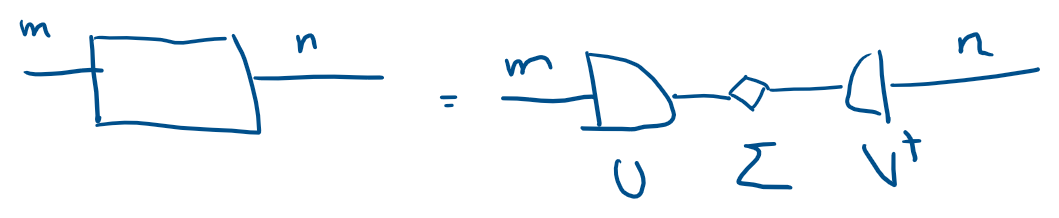



$$S(\Sigma) = - \sum_i |\lambda_i| ^2 \log_2|\lambda_i|^2 $$


Donde: 
$$\Sigma_{i,j} = \lambda_i \delta_{ij}$$

Así pues debemos primero generar la matriza y después hacer la svd.

In [ ]:
def entanglement_entropy(m_):
    s_ = np.linalg.svd(m_, full_matrices=False, compute_uv=False)
    return - s_**2 @ np.log2(s_**2)

### 2.1 A = {1,2}. B = {3, 4, 5}

In [ ]:
import copy

In [ ]:
M = copy.deepcopy(T)
M = M.reshape(np.prod(M.shape[:2]), np.prod(M.shape[2:]))
entanglement_entropy(M)

### 2.2 A = {1,3}, B={2,4,5}

In [ ]:
M = copy.deepcopy(T)
M = M.transpose((0, 2, 1, 3, 4))
M.shape
M = M.reshape(np.prod(M.shape[:2]), np.prod(M.shape[2:])) 
entanglement_entropy(M)

### 2.3 A = {1,5}, B={2,3,4}

In [ ]:
M = copy.deepcopy(T)
M = M.transpose((0, 4, 1, 2, 3))
M.shape
M = M.reshape(np.prod(M.shape[:2]), np.prod(M.shape[2:])) 
entanglement_entropy(M)

## 3. Interpretacion SVD  y MPS

Vamnos a generar un tensor con $L$ patas y cada una de ellas tiene un espacion $d$ dimensional asociado

Cuando hacemos la descomposición SVD se pone así ...Pero creo que no se entiende bien

$$T_{\sigma_1 \sigma_2 \cdots \sigma_{L-1} \sigma_L} = \sum_{a_1 a_2 \cdots a_L} A_{a_1}^{\sigma_1} A_{a_1, a_2}^{\sigma_2} A_{a_2, a_3}^{\sigma_3} \cdots A_{a_{L-1}, a_L}^{\sigma_{L-1}} A_{a_{L-1}}^{\sigma_{L}}$$ 

Si usamos el convenio de sumación de Einstein creo que queda más claro

$$T_{\sigma_1 \sigma_2 \cdots \sigma_{L-1} \sigma_L} =A_{a_1}^{\sigma_1} A_{a_1, a_2}^{\sigma_2} A_{a_2, a_3}^{\sigma_3} \cdots A_{a_{L-1}, a_L}^{\sigma_{L-1}} A_{a_{L-1}}^{\sigma_{L}}$$

Siempre tenemos que tener presente que estos son productos matriciales

$$\vec{A^{\sigma_1}} \hat{A^{\sigma_2}} \hat{A^{\sigma_3}} \cdots \hat{A^{\sigma_{L-1}}} \vec{A^{\sigma_L}}$$

In [ ]:
d = 5
L = 6
T = np.random.random(tuple([d]*L))
T.shape

Vamos a descomponerlo haciendo una **SVD** donde nos cargamos todos los valores de la diagonal que sean cero (hasta precisión del ordenador)

En el siguiente caso *mps_svd* es una lista con los $A^{\sigma_i}$

In [ ]:
mps_svd, d_alphas_svd, sizes_svd, entropy_svd = tn.mps_svd_lr_decompose(T)

In [ ]:
d_alphas_svd

Cuando hacemos la descomposición SVD se pone así ...Pero creo que no se entiende bien

$$T_{\sigma_1 \sigma_2 \cdots \sigma_{L-1} \sigma_L} = \sum_{a_1 a_2 \cdots a_L} A_{a_1}^{\sigma_1} A_{a_1, a_2}^{\sigma_2} A_{a_2, a_3}^{\sigma_3} \cdots A_{a_{L-1}, a_L}^{\sigma_{L-1}} A_{a_{L-1}}^{\sigma_{L}}$$ 


Si usamos el convenio de sumación de Einstein creo que queda más claro

$$T_{\sigma_1 \sigma_2 \cdots \sigma_{L-1} \sigma_L} =A_{a_1}^{\sigma_1} A_{a_1, a_2}^{\sigma_2} A_{a_2, a_3}^{\sigma_3} \cdots A_{a_{L-1}, a_L}^{\sigma_{L-1}} A_{a_{L-1}}^{\sigma_{L}}$$

Siempre tenemos que tener presente que estos son productos matriciales

$$\vec{A^{\sigma_1}} \hat{A^{\sigma_2}} \hat{A^{\sigma_3}} \cdots \hat{A^{\sigma_{L-1}}} \vec{A^{\sigma_L}}$$

Los tensores $A^{\sigma_1}$ y $A^{\sigma_L}$ son tensores de rank-2 mientras los demás tensores $A^{\sigma_i}$ son tensores de rank-3. Esto implica que al seleccionar uno de los elementos de los tensores $A^{\sigma_1}$ y $A^{\sigma_L}$ (por ejemplo $\sigma_1=3$) lo que tendremos es un vector mientras que si elegimos un elemento de $A^{\sigma_i}$ lo que tenemos será una matriz. De ahi la notación vectorial y de gorrito utilizada


Es decir a cada componente del tensor se puede acceder haciendo la multiplicación de las matrices asociadas a cada índice:

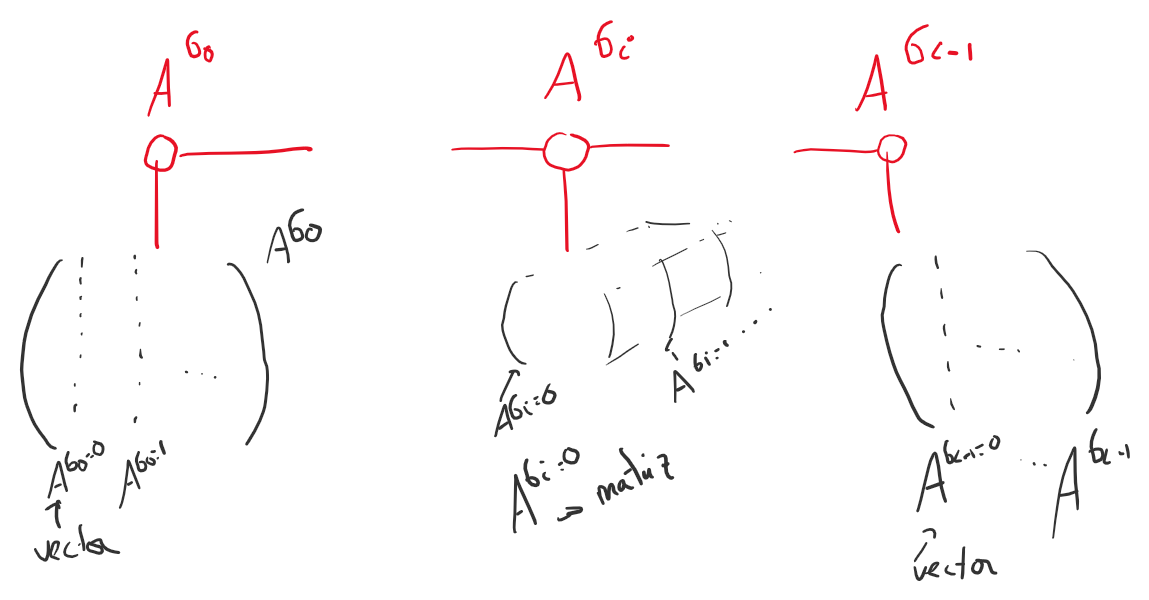

Podemos convertir $A^{\sigma_1}$ y $A^{\sigma_L}$ en tensores de rank-3 sin más que aññadir una dimmensión **dummy**. Esto es lo que devuelve la descomposición en left to right en MPS usando SVD como se puede compobar en la siguiente celda:

In [ ]:
[i.shape for i in mps_svd]

Adicionalmente cabe destacar que estos tensores de rank-3 al provenir de una SVD left to right son isometrías ya que los conformamos con la matriz $U$ de la **SVD** ($M=U \Sigma V^{T}$). Esto implica que:

$$U^{\dagger}U=I$$

y que:

$$U U^{\dagger}= P$$

Siendo $P$ un proyector.

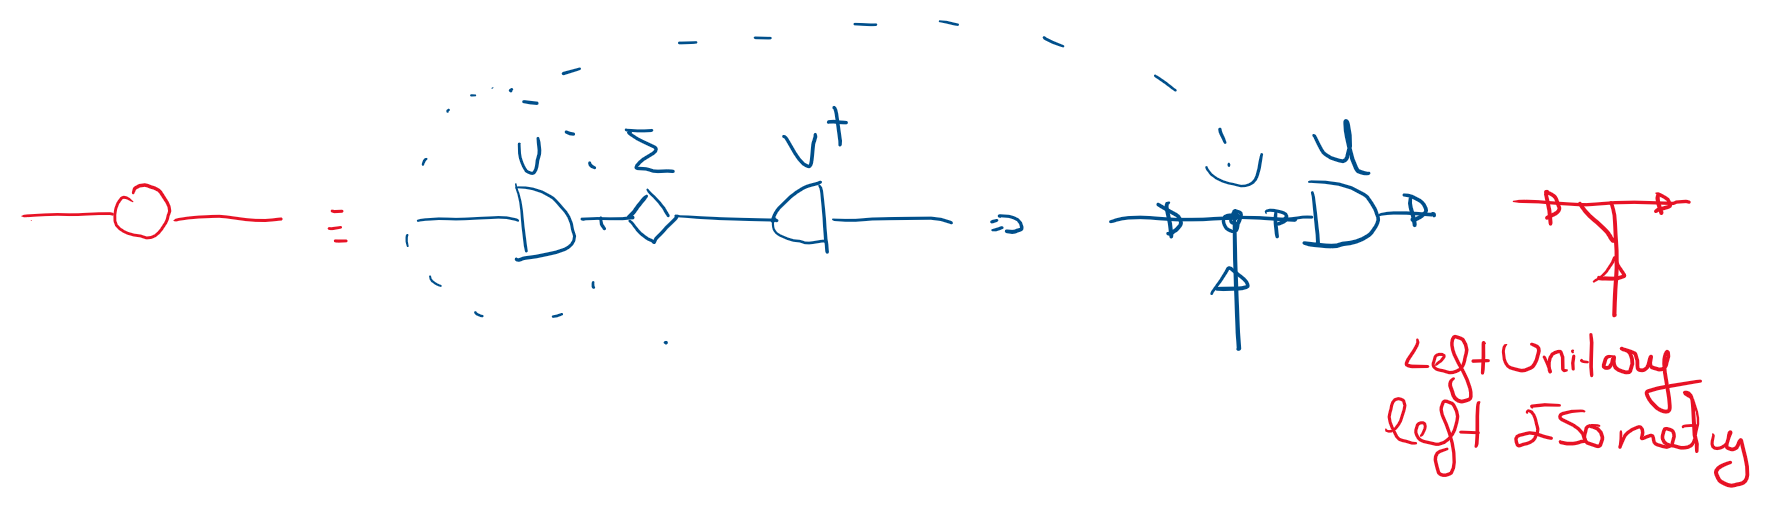

In [ ]:
sigma1=0
sigma2=0
sigma3=0
sigma4=0
sigma5=2
sigma6=0

In [ ]:
#Calculamos el elemento como un producto de matrices.
#La matriz vendrá dada por la matriz correspondiente al índice de la pierna 
#física del tensor
elemento = mps_svd[0][:,sigma1,:] @ mps_svd[1][:,sigma2,:] @ mps_svd[2][:, sigma3, :] \
    @ mps_svd[3][:, sigma4, :] @ mps_svd[4][:, sigma5, :] @ mps_svd[5][:, sigma6, :] 

El tensor original $T_{\sigma_1 \sigma_2 \cdots \sigma_{L-1} \sigma_L}$

In [ ]:
np.isclose(elemento, T[sigma1, sigma2, sigma3, sigma4, sigma5, sigma6])

Cada uno de los tensores de rank3 $A^{\sigma_i}$ verifica:

$$\sum_{\sigma_l} {A^{\sigma_l}}^{\dagger} A^{\sigma_l} = I  $$

Esto se verifica porque los tensores de rank-3 $A^{\sigma_i}$ provienen de una descomposición SVD realizada left to right por lo que está conformada por matrices $U$ isométricas de tal modo que: $U^{\dagger}U=I$. La fórmula anterior equivaldría a una suma de los productos matriciales que conforman los distintos índices de la pata física. En notación de tensor networks los que estaríamos haciendo sería:

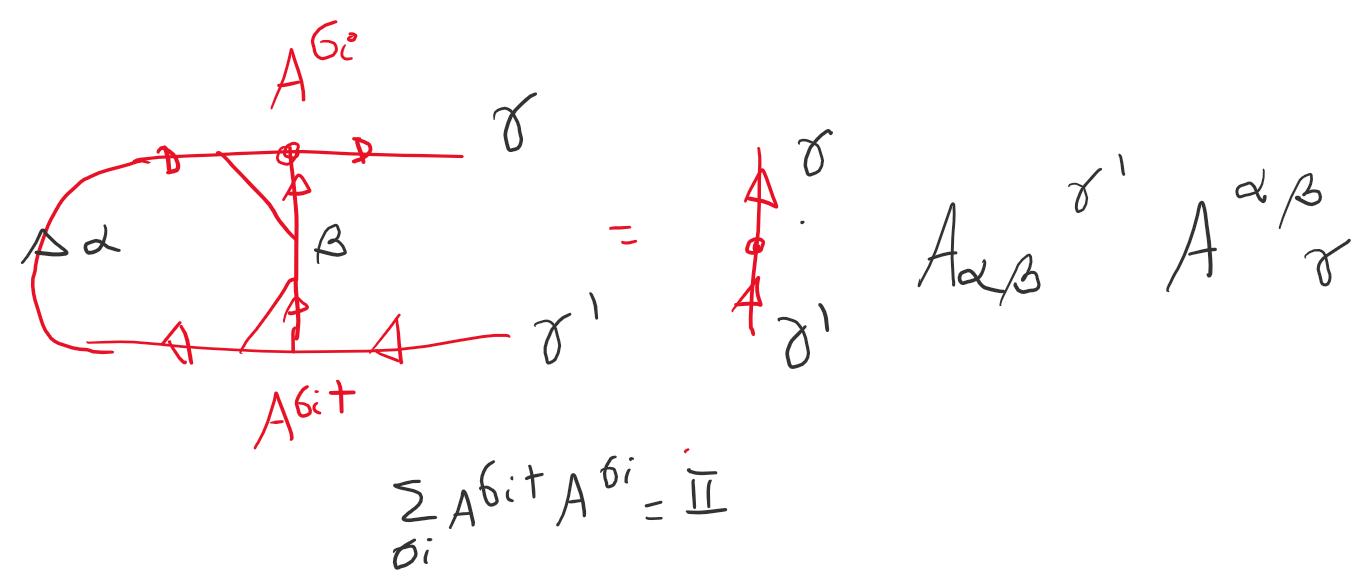

En las siguientes celdas comprobamos que las contracciones planteadas en tensor networks equivalen a la suma de los productos matriciales

In [ ]:
A0 = mps_svd[0]
a = tn.contract_indices(A0, A0, [0,1], [0,1])
np.isclose(a, np.identity(a.shape[0])).all()

In [ ]:
b = A0[:, 0, :].T @ A0[:, 0, :] + A0[:, 1, :].T @ A0[:, 1, :] + \
A0[:, 2, :].T @ A0[:, 2, :] + A0[:, 3, :].T @ A0[:, 3, :] + \
A0[:, 4, :].T @ A0[:, 4, :]
np.isclose(b, np.identity(b.shape[0])).all()

In [ ]:
np.isclose(a, b).all()

In [ ]:
A1 = mps_svd[1]
a = tn.contract_indices(A1, A1, [0,1], [0,1])
np.isclose(a, np.identity(a.shape[0])).all()

In [ ]:
b = A1[:, 0, :].T @ A1[:, 0, :] + A1[:, 1, :].T @ A1[:, 1, :] + \
A1[:, 2, :].T @ A1[:, 2, :] + A1[:, 3, :].T @ A1[:, 3, :] + \
A1[:, 4, :].T @ A1[:, 4, :]
np.isclose(b, np.identity(b.shape[0])).all()

In [ ]:
np.isclose(a, b).all()

In [ ]:
A2 = mps_svd[2]
a = tn.contract_indices(A2, A2, [0,1], [0,1])
np.isclose(a, np.identity(a.shape[0])).all()

In [ ]:
b = A2[:, 0, :].T @ A2[:, 0, :] + A2[:, 1, :].T @ A2[:, 1, :] + \
A2[:, 2, :].T @ A2[:, 2, :] + A2[:, 3, :].T @ A2[:, 3, :] + \
A2[:, 4, :].T @ A2[:, 4, :]
np.isclose(b, np.identity(b.shape[0])).all()

In [ ]:
np.isclose(a, b).all()

Como provienen de una isometría los tensores de rank-3 $A^{\sigma_i}$ no son abeliano:

$$A^{\sigma_i} {A^{\sigma_i}}^T = P$$

$P$ is a projector

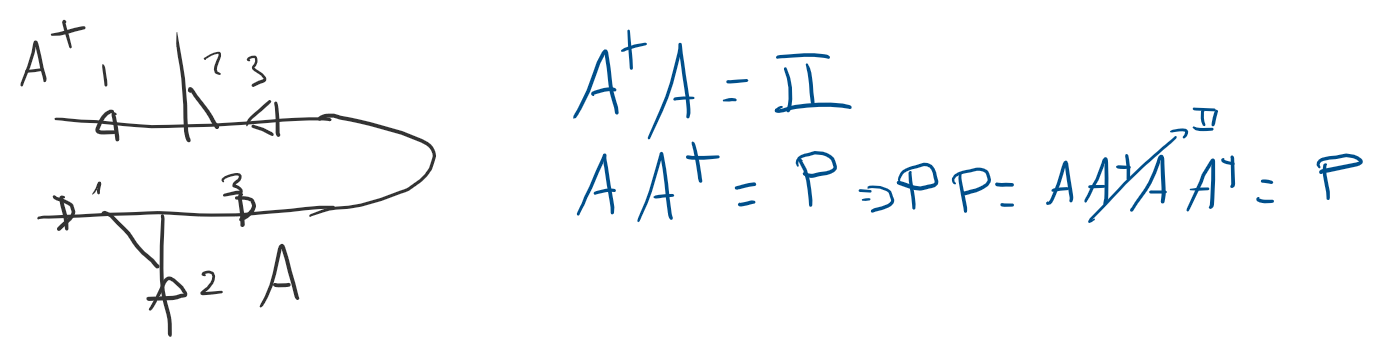

In [ ]:
# A @ A.T = P
a = tn.contract_indices(A0, A0, [2], [2])
# reshaping to a matrix
b = a.reshape(np.prod(a.shape[0:2]), np.prod(a.shape[1:3]))
# It is a Projector!!
np.isclose(b @ b, b).all()

In [ ]:
# A @ A.T = P
a = tn.contract_indices(A1, A1, [2], [2])
# reshapeing to a matrix
b = a.reshape(np.prod(a.shape[0:2]), np.prod(a.shape[1:3]))
# It is a Projector!!
np.isclose(b @ b, b).all()

In [ ]:
# A @ A.T = P
a = tn.contract_indices(A2, A2, [2], [2])
# reshapeing to a matrix
b = a.reshape(np.prod(a.shape[0:2]), np.prod(a.shape[1:3]))
# It is a Projector!!
np.isclose(b @ b, b).all()